In [53]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_data_df,mouse_data_df, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [29]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group = combined_df.groupby(["Drug", "Timepoint"])
tumor_mean = tumor_group["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)
# Preview DataFrame
tumor_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [54]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_error = tumor_group["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
std_tumor_error_df = pd.DataFrame(std_tumor_error)
# Preview DataFrame
std_tumor_error_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [55]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = tumor_mean_df.reset_index().pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
std_tumor_error_pivot = std_tumor_error_df.reset_index().pivot(index="Timepoint", columns="Drug")\
["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


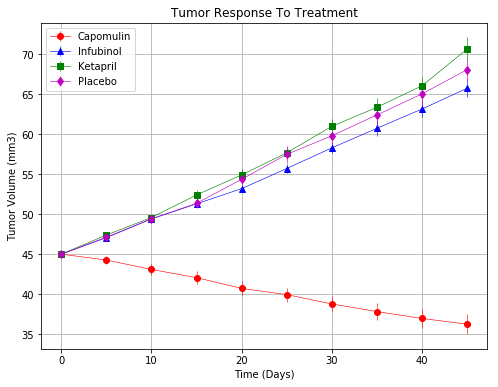

In [62]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(8,6))

plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Capomulin"], yerr=std_tumor_error_pivot["Capomulin"],color="r",\
            marker="o", markersize=6, linewidth=0.6)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Infubinol"], yerr=std_tumor_error_pivot["Infubinol"],color="b",\
            marker="^", markersize=6, linewidth=0.6)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Ketapril"], yerr=std_tumor_error_pivot["Ketapril"],color="g",\
            marker="s", markersize=6, linewidth=0.6)
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Placebo"], yerr=std_tumor_error_pivot["Placebo"],color="m",\
            marker="d", markersize=6, linewidth=0.6)

# Set Graph title, labels etc

plt.title("Tumor Response To Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best")
# Save the Figure
plt.savefig("TumerResponseToTreatment.png")

#Show the plot
plt.show()


## Metastatic Response to Treatment

In [59]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = tumor_group["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)
# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [60]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_met = tumor_group["Metastatic Sites"].sem()

# Convert to DataFrame
std_error_met_df = pd.DataFrame(std_error_met)

# Preview DataFrame
std_error_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [61]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot = mean_met_df.reset_index().pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
std_error_met_pivot = std_error_met_df.reset_index().pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
mean_met_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


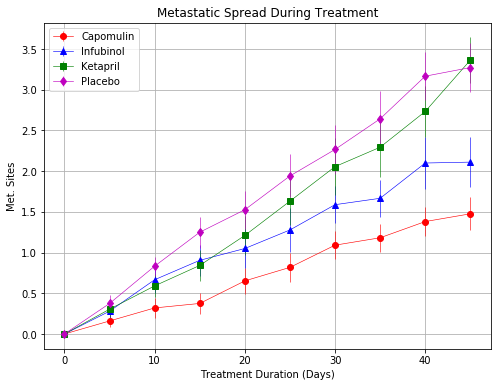

In [63]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,6))

plt.errorbar(mean_met_pivot.index, mean_met_pivot["Capomulin"], yerr=std_error_met_pivot["Capomulin"],color="r",\
            marker="o", markersize=6, linewidth=0.6)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Infubinol"], yerr=std_error_met_pivot["Infubinol"],color="b",\
            marker="^", markersize=6, linewidth=0.6)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Ketapril"], yerr=std_error_met_pivot["Ketapril"],color="g",\
            marker="s", markersize=6, linewidth=0.6)
plt.errorbar(mean_met_pivot.index, mean_met_pivot["Placebo"], yerr=std_error_met_pivot["Placebo"],color="m",\
            marker="d", markersize=6, linewidth=0.6)
# Set Graph title, labels etc

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend(loc="best")
# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

#Show the plot
plt.show()


## Survival Rates

In [64]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = tumor_group["Mouse ID"].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})
# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [65]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.reset_index().pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [67]:
# Mice Survival Rates data for graph
mice_graph_data = mice_count_pivot / mice_count_pivot.iloc[0]*100
mice_graph_data[["Capomulin","Infubinol","Ketapril","Placebo"]]

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


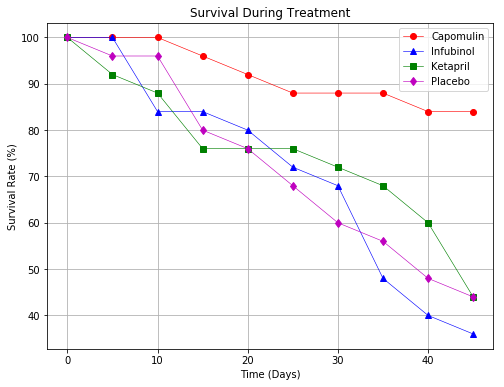

In [68]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(8,6))
plt.plot(mice_graph_data["Capomulin"],color="r",marker="o", markersize=6, linewidth=0.6)
plt.plot(mice_graph_data["Infubinol"],color="b",marker="^", markersize=6, linewidth=0.6)
plt.plot(mice_graph_data["Ketapril"],color="g",marker="s", markersize=6, linewidth=0.6)
plt.plot(mice_graph_data["Placebo"],color="m",marker="d", markersize=6, linewidth=0.6)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc="best")
# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [69]:
# Calculate the percent changes for each drug
drug_pct_chg = (tumor_mean_pivot.iloc[-1]-tumor_mean_pivot.iloc[0])/tumor_mean_pivot.iloc[0]*100
# Display the data to confirm
drug_pct_chg


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

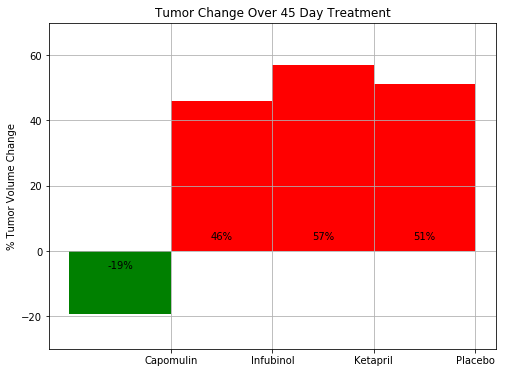

In [77]:
# Store all Relevant Percent Changes into a Tuple
drug_pct_chg_tuple = (drug_pct_chg["Capomulin"],
                      drug_pct_chg["Infubinol"],
                      drug_pct_chg["Ketapril"],
                      drug_pct_chg["Placebo"])
# Splice the data between passing and failing drugs


fig, ax = plt.subplots()
ind = np.arange(len(drug_pct_chg_tuple))
rects1 = ax.bar(ind[0], drug_pct_chg_tuple[0], width = 1, color = "g")
rects2 = ax.bar(ind[1:], drug_pct_chg_tuple[1:], width = 1, color = "r")

fig.set_size_inches(8,6)
# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim ([-30, 70])
ax.grid(True)


# Use functions to label the percentages of changes
def autolabel(rects, ht):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., ht,
                '%d%%' % int(height),
                 ha = 'center', va = 'bottom')
     
        
# Call functions to implement the function calls
autolabel(rects1, -6)
autolabel(rects2, 3)

# Save the Figure
plt.savefig("TumorChangeOver45DayTreatment.png")

# Show the Figure
plt.show()